# Tratando dados

In [138]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [139]:
sns.__version__

'0.11.2'

In [140]:
dados = pd.read_csv('desmatamento_geral.csv')
dados

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
995,2016,Bahia,Fevereiro,418,2016-01-01
996,2017,Bahia,Fevereiro,100,2017-01-01
997,1998,Bahia,Março,0,1998-01-01
998,1999,Bahia,Março,83,1999-01-01


In [141]:
dados.pop('date')

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
995    2016-01-01
996    2017-01-01
997    1998-01-01
998    1999-01-01
999    2000-01-01
Name: date, Length: 1000, dtype: object

In [142]:
dados.head()

,year,state,month,number
0,1998,Acre,Janeiro,0
1,1999,Acre,Janeiro,0
2,2000,Acre,Janeiro,0
3,2001,Acre,Janeiro,0
4,2002,Acre,Janeiro,0


In [143]:
dados.columns

Index(['year', 'state', 'month', 'number'], dtype='object')

In [144]:
index = {'year': 'ano', 'state': 'estado', 'month': 'mes', 'number': 'numero_de_queimadas'}

In [145]:
dados = dados.rename(columns = index)
dados.head()

,ano,estado,mes,numero_de_queimadas
0,1998,Acre,Janeiro,0
1,1999,Acre,Janeiro,0
2,2000,Acre,Janeiro,0
3,2001,Acre,Janeiro,0
4,2002,Acre,Janeiro,0


# Queimadas por mês nos estados

In [146]:
queimadas_mes = pd.crosstab(dados.estado, dados.mes, aggfunc= 'mean', values = dados.numero_de_queimadas)
queimadas_mes

mes,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Maio,Março,Novembro,Outubro,Setembro
estado,,,,,,,,,,,,
Acre,2.05,319.6,2.473684,0.95,2.000000,114.80,12.85,4.05,1.150000,35.40,362.35,65.60
Alagoas,12.25,2.0,50.736842,25.15,44.428571,0.55,1.00,2.80,27.700000,35.90,21.70,8.30
Amapa,0.65,13.7,237.052632,1.00,13.950000,1.60,1.25,0.65,0.800000,352.60,384.30,95.85
Amazonas,9.60,145.0,117.052632,52.35,76.550000,190.45,30.90,10.95,36.400000,292.15,391.35,185.45
Bahia,NaN,NaN,NaN,164.25,190.600000,NaN,NaN,NaN,49.333333,NaN,NaN,NaN


In [147]:
queimadas_mes_percentual = pd.crosstab(dados.estado, dados.mes, aggfunc= 'mean', 
                                       values = dados.numero_de_queimadas, normalize= True).round(4)* 100
queimadas_mes_percentual

mes,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Maio,Março,Novembro,Outubro,Setembro
estado,,,,,,,,,,,,
Acre,0.05,7.61,0.06,0.02,0.05,2.73,0.31,0.10,0.03,0.84,8.62,1.56
Alagoas,0.29,0.05,1.21,0.60,1.06,0.01,0.02,0.07,0.66,0.85,0.52,0.20
Amapa,0.02,0.33,5.64,0.02,0.33,0.04,0.03,0.02,0.02,8.39,9.15,2.28
Amazonas,0.23,3.45,2.79,1.25,1.82,4.53,0.74,0.26,0.87,6.95,9.31,4.41
Bahia,0.00,0.00,0.00,3.91,4.54,0.00,0.00,0.00,1.17,0.00,0.00,0.00


#### Os maiores numeros de queimadas em um mês estão concentrados no estado do Amapa e no Amazonas

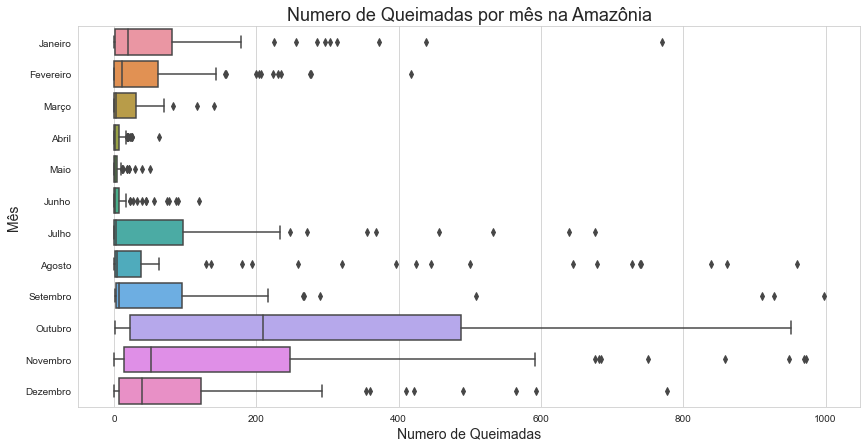

In [148]:
sns.set_style('whitegrid')
ax = sns.boxplot(y= 'mes', x = 'numero_de_queimadas', data = dados)
ax.figure.set_size_inches(14, 7)
ax.set_title('Numero de Queimadas por mês na Amazônia', fontsize = 18)
ax.set_ylabel('Mês', fontsize = 14)
ax.set_xlabel('Numero de Queimadas', fontsize = 14)
ax = ax

In [149]:
queimadas_ano = pd.crosstab(dados.estado, dados.ano, aggfunc= 'mean', values = dados.numero_de_queimadas).round(2)
queimadas_ano

ano,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
estado,,,,,,,,,,,,,,,,,,,,
Acre,60.83,27.75,36.17,69.00,128.67,78.92,98.67,82.00,101.75,101.08,95.33,69.25,39.67,59.08,98.83,92.33,46.42,99.25,102.08,56.18
Alagoas,7.17,14.33,10.25,7.17,21.50,24.92,13.25,18.08,13.42,10.67,23.08,27.08,18.50,19.33,29.33,17.33,15.83,49.17,33.33,13.25
Amapa,23.17,8.42,21.08,108.42,71.83,137.67,188.42,105.92,68.08,36.67,65.42,92.42,60.08,91.67,175.25,81.25,124.17,112.83,124.42,133.18
Amazonas,78.83,88.42,71.08,108.08,237.67,127.00,191.50,138.08,83.08,49.08,226.42,110.00,193.75,137.67,92.50,75.42,198.83,99.17,171.75,82.45
Bahia,0.00,118.00,42.67,62.50,164.50,331.00,140.00,223.00,251.00,243.00,274.50,147.00,251.50,128.50,189.50,178.00,119.50,199.50,351.50,127.00


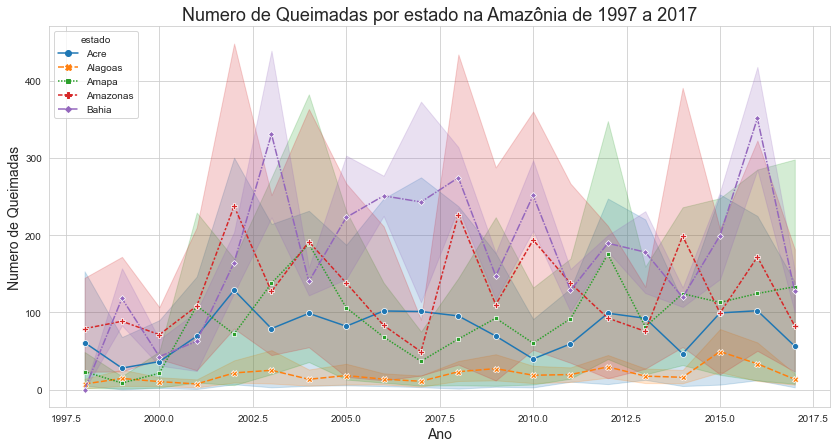

In [150]:
sns.set_style('whitegrid')
ax = sns.lineplot(x= 'ano', y = 'numero_de_queimadas', hue = 'estado', data = dados, style= 'estado', markers= True)
ax.figure.set_size_inches(14, 7)
ax.set_title('Numero de Queimadas por estado na Amazônia de 1997 a 2017', fontsize = 18)
ax.set_ylabel('Numero de Queimadas', fontsize = 14)
ax.set_xlabel('Ano', fontsize = 14)
ax = ax

#### Os maiores números de queimadas estão concentrados no estado da Bahia, Amazonas e Amapá

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

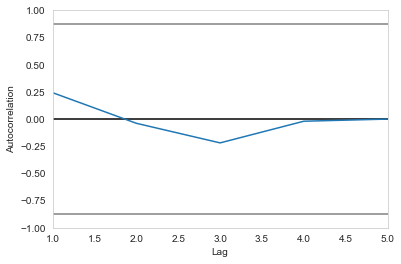

In [151]:
correlacao = pd.plotting.autocorrelation_plot(queimadas_ano)
correlacao

#### Não existe correlação positiva entre as queimadas no decorrer dos ano